# PARTICIPANTES:
* ## CARLOS MENESES
* ## PABLO MENDEZ 
* ## PEDRO JOSE FERNANDEZ







# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)







# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


In [153]:
#hecho

# Publicación de script de Análisis

En Github + Zenodo

In [154]:
#hecho

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [155]:
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
import pandas as pd

In [156]:
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/2541802',headers)
record = json.loads(r.text)
print(record['files'])

[{'bucket': '6db81605-6f1b-4f3a-a3e6-05f01dd2de44', 'checksum': 'md5:a2663c915f9fd9f3ad02c5c3e6f9c3c5', 'key': 'turZo.csv', 'links': {'self': 'https://zenodo.org/api/files/6db81605-6f1b-4f3a-a3e6-05f01dd2de44/turZo.csv'}, 'size': 841738, 'type': 'csv'}]


In [157]:
link=record['files'][0]['links']['self']

In [158]:
response = requests.get(link)
if response.status_code == 200:
    with open("./turZo.csv", 'wb') as f:
        f.write(response.content)

# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [159]:
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/2542000',headers)
record = json.loads(r.text)
print(record['files'])

[{'bucket': '61b674aa-a3b3-455b-a981-b70ad235b469', 'checksum': 'md5:d754ff52dcbad1898710b2b30593aa74', 'key': 'Cma94/workflou-2.0.zip', 'links': {'self': 'https://zenodo.org/api/files/61b674aa-a3b3-455b-a981-b70ad235b469/Cma94/workflou-2.0.zip'}, 'size': 528, 'type': 'zip'}]


In [160]:
link=record['files'][0]['links']['self']

In [161]:
response = requests.get(link)
if response.status_code == 200:
    with open("./workflou-2.0.zip", 'wb') as f:
        f.write(response.content)

In [162]:
zip_ref = zipfile.ZipFile('workflou-2.0.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

In [165]:
mv Cma94*/tenerife.py .

In [166]:
rm -rf Cma94*

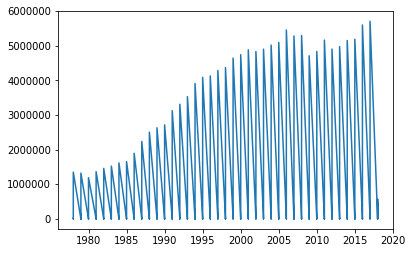

In [167]:
%run -i tenerife.py 

# Publicación de los Datos

Utilizando la API de Zenodo

In [182]:
headers = {"Content-Type": "application/json"}
r = requests.post('https://zenodo.org/api/deposit/depositions',
                   params={'access_token': 'bMk99QoimL88XSnXKmegC5NxdGUQ31fo220q5Vm5Nej31NZBX22HaEh0hlQO'}, json={},
                   headers=headers)
r.status_code
r.json()


{'conceptrecid': '2542027',
 'created': '2019-01-16T18:08:53.078425+00:00',
 'files': [],
 'id': 2542028,
 'links': {'bucket': 'https://zenodo.org/api/files/a014d063-e9c7-417b-b993-58e0d4516f02',
  'discard': 'https://zenodo.org/api/deposit/depositions/2542028/actions/discard',
  'edit': 'https://zenodo.org/api/deposit/depositions/2542028/actions/edit',
  'files': 'https://zenodo.org/api/deposit/depositions/2542028/files',
  'html': 'https://zenodo.org/deposit/2542028',
  'latest_draft': 'https://zenodo.org/api/deposit/depositions/2542028',
  'latest_draft_html': 'https://zenodo.org/deposit/depositions/2542028',
  'publish': 'https://zenodo.org/api/deposit/depositions/2542028/actions/publish',
  'self': 'https://zenodo.org/api/deposit/depositions/2542028'},
 'metadata': {'prereserve_doi': {'doi': '10.5281/zenodo.2542028',
   'recid': 2542028}},
 'modified': '2019-01-16T18:08:53.078432+00:00',
 'owner': 58110,
 'record_id': 2542028,
 'state': 'unsubmitted',
 'submitted': False,
 'title'

In [183]:
# Get the deposition id from the previous response
deposition_id = r.json()['id']
data = {'filename': 'tenerife.png'}
files = {'file': open('tenerife.png', 'rb')}
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                   params={'access_token': 'bMk99QoimL88XSnXKmegC5NxdGUQ31fo220q5Vm5Nej31NZBX22HaEh0hlQO'}, data=data,
                   files=files)
r.status_code
r.json()



{'checksum': '986e314079123c3930f3534df2bdb4ba',
 'filename': 'tenerife.png',
 'filesize': 26715,
 'id': 'e4529c05-332d-48d7-b965-555ad2c35868',
 'links': {'download': 'https://zenodo.org/api/files/a014d063-e9c7-417b-b993-58e0d4516f02/tenerife.png',
  'self': 'https://zenodo.org/api/deposit/depositions/2542028/files/e4529c05-332d-48d7-b965-555ad2c35868'}}

In [186]:
data = {
     'metadata': {
         'title': 'Tenerife plot',
         'upload_type': 'poster',
         'description': 'This is my first upload',
         'creators': [{'name': 'PCP',
                       'affiliation': 'Zenodo'}]
     }
}
r = requests.put('https://zenodo.org/api/deposit/depositions/%s' % deposition_id,
                  params={'access_token': 'bMk99QoimL88XSnXKmegC5NxdGUQ31fo220q5Vm5Nej31NZBX22HaEh0hlQO'}, data=json.dumps(data),
                  headers=headers)
r.status_code


200

In [187]:
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/actions/publish' % deposition_id,
                      params={'access_token': 'bMk99QoimL88XSnXKmegC5NxdGUQ31fo220q5Vm5Nej31NZBX22HaEh0hlQO'} )
r.status_code

202

¿Puedes replicar ese workflow en un sólo bloque con otros datos?